In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import PIL.Image
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
input_shape=IMAGE_SHAPE + (3,))])

2022-07-21 14:51:42.690612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


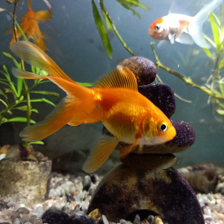

In [15]:
goldfish_image = PIL.Image.open("goldfish.jpeg").resize(IMAGE_SHAPE)
goldfish_image

In [16]:
goldfish_scaled = np.array(goldfish_image) / 255.0
goldfish_scaled.shape

(224, 224, 3)

In [17]:
goldfish_scaled[np.newaxis, ...].shape

(1, 224, 224, 3)

In [20]:
result = classifier.predict(goldfish_scaled[np.newaxis, ...])

1/1 [==============================] - 0s 85ms/step


In [26]:
predicted_label_index = np.argmax(result)

In [24]:
with open("labels.txt") as f:
    labels = f.readlines()

labels_cleaned = [label.replace("\n", "") for label in labels]
labels_cleaned

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [27]:
labels_cleaned[predicted_label_index]

'goldfish'